# Задача 5 Варіант 19
Мої показники за таблицею №3:
а = 3
b = 0
c = 1
d = 2

Коефіцієнти моделі: [ 0.28 -0.02] -0.11999999999999988
Коефіцієнт детермінації R^2: 0.6566666666666666
Прогноз для точки [2 2]: 0.4 (після порогу: 0)


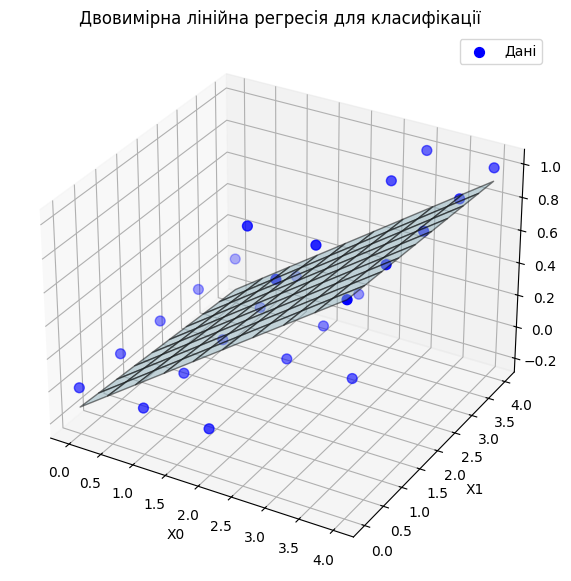

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Задання параметрів
a = 3
b = 0
c = 1
d = 2

# Генерація даних
x = np.array([[0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4], 
              [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4]])
y = a * x[0] + b * x[1] + c + np.random.normal(0, 1 + d, 25)
y = (y > y.mean()).astype(int)

# Транспонування для сумісності з моделлю
x = x.T

# Створення та навчання моделі лінійної регресії
model = LinearRegression()
model.fit(x, y)

# Виведення коефіцієнтів моделі та метрик регресії
print("Коефіцієнти моделі:", model.coef_, model.intercept_)
print("Коефіцієнт детермінації R^2:", model.score(x, y))

# Прогноз у довільній точці, наприклад, (2, 2)
test_point = np.array([[2, 2]])
prediction = model.predict(test_point)
print(f"Прогноз для точки {test_point[0]}: {prediction[0]} (після порогу: {int(prediction[0] > 0.5)})")

# Побудова 3D графіка
X0, X1 = np.meshgrid(np.linspace(0, 4, 10), np.linspace(0, 4, 10))
X_grid = np.c_[X0.ravel(), X1.ravel()]
Z = model.predict(X_grid).reshape(X0.shape)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Відображення точок даних
ax.scatter(x[:, 0], x[:, 1], y, color='blue', marker='o', s=50, label='Дані')

# Відображення межі прийняття рішень
ax.plot_surface(X0, X1, Z, color='lightblue', alpha=0.5, edgecolor='k', rstride=1, cstride=1)

# Налаштування підписів осей
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
ax.set_title('Двовимірна лінійна регресія для класифікації')

plt.legend()
plt.show()